Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introdução à Teoria das Vibrações


### Trabalho 01 - Resposta de um sistema com um grau de desloamento livre a uma excitação na base: espectro de pseudo acelerações

[1.   Metodologia](#section_1)  
[2.   Análise dos dados e Resultados](#section_2)  

---
_Caio César Dias Matos, Mestrando em Estruturas - UFRGS_ 

_ID: 00312139_ 

_Porto Alegre, RS, Brasil_ 


In [4]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from MRPy import MRPy


## 1. Metodologia <a name="section_1"></a> 

Para o solicitado, foi-se empregado a aferição e avaliação da vibração de uma mesa de vidro quando sua superfície é excitada por um choque com outro objeto. O sistema a ser aferido foi montado como é mostrado na imagem a seguir:

<img src="datatrab1/trab1setup.jpg" alt="SDOF system" width="480px"/>

O objeto utilizado como projétil nesse caso foi um livro com massa $ m_{p} = 480g$ solto a partir de uma altura constante no valor de $h = 17cm$. O impacto ocorreu em três diferentes momentos, a princípio o projétil foi solto a uma distância $d_{1}
= 15cm$ da posição do acelerômetro, depois $d_{1} = 30cm$ e por fim $d_{1} = 45cm$, gerando assim três excitações no período de aferição. O tampo da mesa tem uma espessura $e = 1cm$ e dimensões de $2 x 1 m$ e sua densidade de massa é considerada $ \rho = 2500 kg/m^{3}$. 

Como acelerômetro, foi utilizado um smartphone do modelo Xiaomi Mi Max 3 em conjunto com um aplicativo disponível para o sistema operacional Android, iNVH  by Bosch, para o resgistro das acelerações da excitação. Com isso, os dados foram coletados no formato $.csv$ para sua implementação e análise com auxílio do Pyhton.


## 2. Análise dos dados e Resultados <a name="section_2"></a> 
Primeiro, é necessário definir as propriedades mecânicas do sistema de grau de liberdade único analisado. Assume-se que:


In [5]:
fn = 1;                    # Frequência natural
wn = 2*np.pi+ fn;          # Frequência angular natural
zt = 0.01;                 # Razão de amortecimento
wd = wn * (1-zt*zt)**0.5;  # Frequência angular amortecida
u0 = 0;                    # Deslocamento inicial
v0 = 0;                    # Velocidade inicial             
m = 2*1*2500*0.01;         # Massa do sistema em kg


Com as propriedades criadas, tem-se então a coleta e plotagem dos dados da seguinte forma:


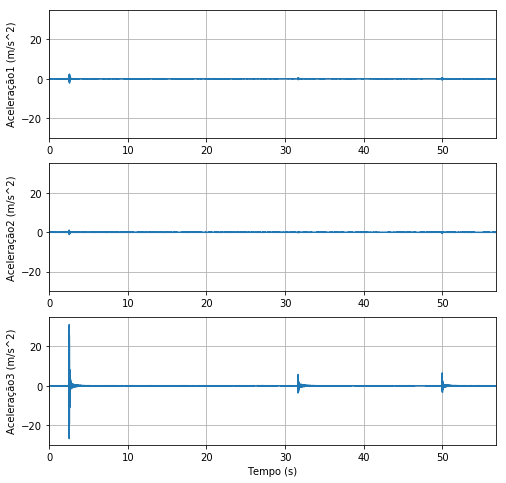

In [6]:
data = MRPy.from_file('datatrab1/livrocaindo', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(6, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-30, 35);
    plt.ylabel('Aceleração{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('Tempo (s)');

Os dados de interesse estão relacionados com as acelerações ao longo do eixo $Z$, referentes aos impactos gerados pelo livro na superfície da mesa. São então isoladas as aferições de respostas da seguinte maneira:


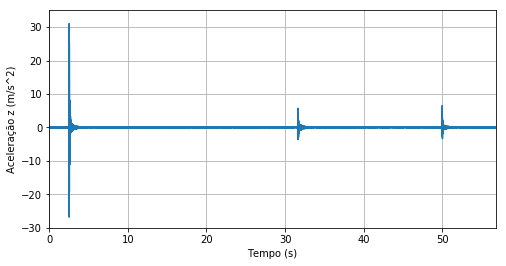

In [10]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('Tempo (s)') 
plt.ylim(-30, 35);   plt.ylabel('Aceleração z (m/s^2)') 

plt.grid(True) 


Utilizando o método de aproximação de Duhamell, é possível encontrar o deslocamento de respota ao impacto ao longo do eixo $Z$ durante a duração da aferição. Tem-se então:


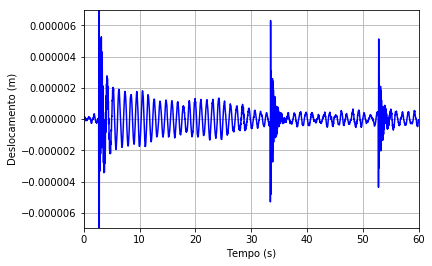

In [16]:


u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m;

t=np.linspace(0,60, np.size(u_DH));


plt.plot(t, u_DH[0], 'b')

plt.xlim(0, max(t));        plt.xlabel('Tempo (s)') 
plt.ylim(-max(max(u_DH)), max(max(u_DH)));   plt.ylabel('Deslocamento (m)') 


plt.grid(True) 



Com isso, é possível realizar algumas variações de frequência para o desenho do pseudo espectro de vibração, tem-se que:

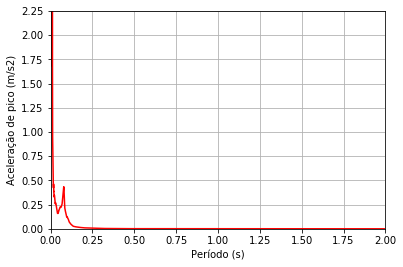

In [48]:
max_a = [ ]
per = [ ]


fn = np.linspace(0.5,100,1000)

for i in range(0, np.size(fn)):
    u_DH = az.sdof_Duhamel(fn[i], zt, u0, v0)/m
    max_a.append(max(max(u_DH))*((2*np.pi*fn[i])**2))
    per.append(1/(fn[i]))
    
plt.plot(per, max_a, 'r')

plt.xlim(0, max(per));        plt.xlabel('Período (s)') 
plt.ylim(-0, max(max_a));   plt.ylabel('Aceleração de pico (m/s2)') 

plt.grid(True) 


Para a excitação explorada, também é possível plotar seu periodograma da seguinte maneira:


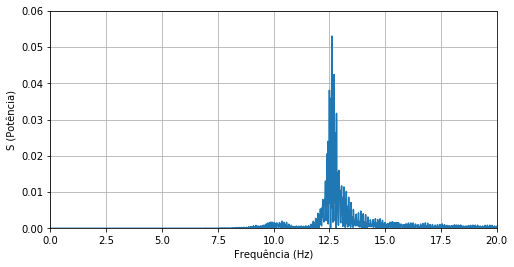

In [67]:
Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0])

plt.xlim(0, 20);   plt.xlabel('Frequência (Hz)') 
plt.ylim(0,  0.06);   plt.ylabel('S (Potência)') 

plt.grid(True)

O sinal do acelerômetro teve uma maior densiade de potêncio em torno de 12.5 $Hz$, o que indicaria que a frequência natural do sistema mecânico formado pela mesa tem seu valor próximo a frequência de maior densidade citada. 
